## Observations and Insights 
* Capomulin and Ramicane were quit effective compared to the others when comparing the statistics of the tumor volume
* Gender distribution of the mice that were tested had only 1.2% difference though Capomulin was tested on more female mice than male mice
* Capomulin treatment on a mouse over period of 45 days showed steady decrease in tumor. If it can be tested for a longer period with equal number of male and femal mice, the results will have more value

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on ='Mouse ID')

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Checking the number of mice.
len(combined_data["Mouse ID"].value_counts())

249

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = combined_data.loc[combined_data['Mouse ID'] == 'g989',:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])

In [27]:
# Checking the number of mice in the clean DataFrame.
clean_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen#
summary_stats = clean_df.groupby('Drug Regimen')

In [29]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_tumor_volume = summary_stats.mean() ['Tumor Volume (mm3)']
median_tumor_volume = summary_stats.median() ['Tumor Volume (mm3)']
variance_tumor_volume = summary_stats.var() ['Tumor Volume (mm3)']
sdev_tumor_volume = summary_stats.std() ['Tumor Volume (mm3)']
sem_tumor_volume = summary_stats.sem() ['Tumor Volume (mm3)']

summary_statistics1 = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume ,
                            'Median Tumor Volume' : median_tumor_volume,
                            'Variance Tumor Volume' : variance_tumor_volume,
                            'Standard Deviation Tumor Volume': sdev_tumor_volume,
                            'SEM Tumor Volume': sem_tumor_volume})

summary_statistics1

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
#This method produces everything in a single groupby function
summary_statistics2 = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of mice')

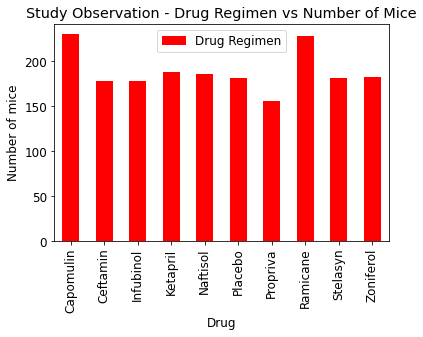

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drug_df= clean_df.groupby('Drug Regimen')
drug_count_df = pd.DataFrame(drug_df['Drug Regimen'].count())

mice_vs_drugs = drug_count_df.plot(kind='bar', title='Study Observation - Drug Regimen vs Number of Mice', color="r")

mice_vs_drugs.set_xlabel('Drug')
mice_vs_drugs.set_ylabel('Number of mice')

<function matplotlib.pyplot.show(close=None, block=None)>

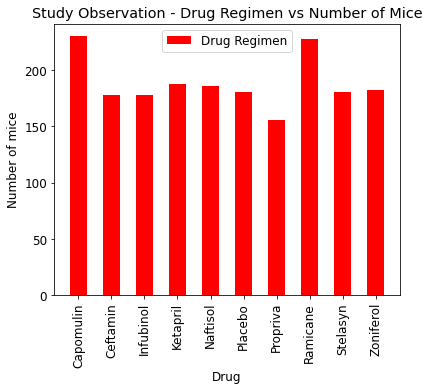

In [32]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(drug_count_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6.2,5))
plt.bar(x_axis, drug_count_df["Drug Regimen"], color= 'r', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_count_df.index), rotation="vertical")

plt.title('Study Observation - Drug Regimen vs Number of Mice')
plt.xlabel('Drug')
plt.ylabel('Number of mice')

column_name = ['Drug Regimen']
plt.legend(column_name,loc='upper center')
plt.show

<AxesSubplot:title={'center':'Gender distribution of mice'}, ylabel='Sex'>

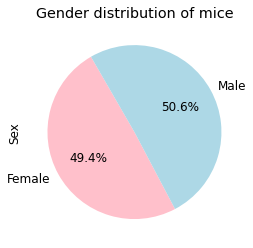

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = combined_data.groupby('Sex')
gender_count = pd.DataFrame(gender['Sex'].count())

gender_count.plot(kind='pie', y='Sex', title='Gender distribution of mice',startangle=120,
                autopct='%1.1f%%', fontsize=12,colors =['pink','lightblue'],legend =False)

Text(0, 0.5, 'Sex')

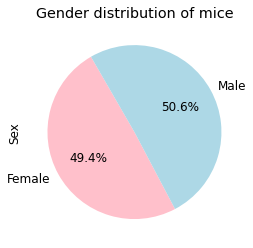

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = list(gender_count.index.values)
gender_counts = gender_count['Sex']
colors = ['pink', 'lightblue']

plt.pie(gender_counts, labels=genders, colors=colors,autopct="%1.1f%%", startangle=120)
plt.rcParams['font.size'] = 12
plt.title('Gender distribution of mice')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

last_tp_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns=
                                        {'Timepoint': 'Last Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, last_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
promising_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
promising_4_tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in promising_4:

    calc_df = merged_df.loc[merged_df['Drug Regimen'] == drug]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
    
    final_tumor_volume = calc_df.loc[calc_df['Timepoint'] == calc_df['Last Timepoint']]
    ftv = final_tumor_volume['Tumor Volume (mm3)']
    promising_4_tumor_volume_data.append(ftv)   

    # Determine outliers using upper and lower bounds

    quartiles = ftv.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    potential_outliers = (ftv.loc[(final_tumor_volume['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_tumor_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()

     

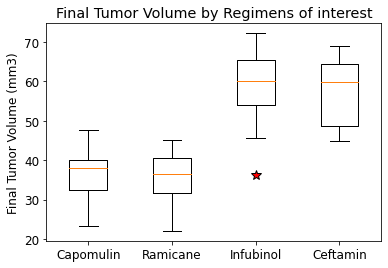

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outlier = dict(marker='*', markerfacecolor='r', markersize=10)
plt.boxplot(promising_4_tumor_volume_data, flierprops = outlier)
plt.title('Final Tumor Volume by Regimens of interest')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()  

## Line and Scatter Plots

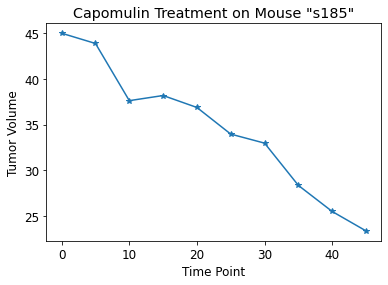

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mice_treated_capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mice_treated_capomulin.head()

#Choose one mouse from the list
mouse = clean_df.loc[clean_df['Mouse ID'] == 's185']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = '*')

plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.title('Capomulin Treatment on Mouse "s185"')
plt.show()

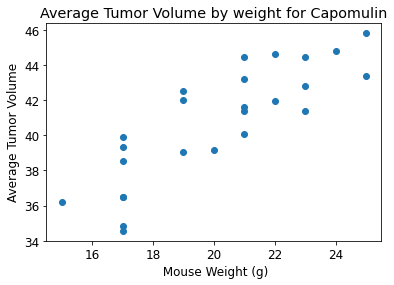

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_regimen_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_vol_df = pd.DataFrame(capomulin_regimen_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

avg_tumor_vol_df = pd.merge(capomulin_regimen_df, avg_tumor_vol_df, on='Mouse ID')
avg_vol_df = avg_tumor_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()

x = avg_vol_df['Weight (g)']
y = avg_vol_df['Average Tumor Volume']

plt.scatter(x, y)
plt.xlabel(" Mouse Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title('Average Tumor Volume by weight for Capomulin')

plt.show()

## Correlation and Regression

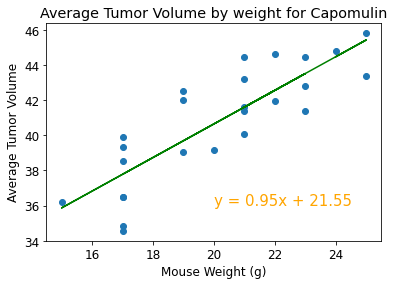

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = avg_vol_df['Weight (g)']
y = avg_vol_df['Average Tumor Volume']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"g-")
plt.annotate(line_eq,(20,36),fontsize=15,color="orange")

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Average Tumor Volume by weight for Capomulin')
plt.show()
